In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import random

In [20]:
snp500url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
snp1000url = "https://en.wikipedia.org/wiki/List_of_S%26P_1000_companies"

#scraping wikipedia to fetch S&P 500 stock list
snp500_data_table = pd.read_html(snp500url)
snp1000_data_table = pd.read_html(snp1000url)

In [22]:
snp_500_tickers = snp500_data_table[0][1:]['Symbol'].tolist()
snp_1000_tickers = snp1000_data_table[3]['Ticker symbol'].tolist()

print("Number of S&P500 Companies: " + str(len(snp_500_tickers)))
print("Number of S&P1000 Companies: " + str(len(snp_1000_tickers)))

Number of S&P500 Companies: 504
Number of S&P1000 Companies: 1000


In [23]:
large_cap_tickers = random.sample(snp_500_tickers, 50)
mid_and_small_cap_tickers = random.sample(snp_1000_tickers, 50)

In [24]:
large_cap = []
for ticker in tqdm(large_cap_tickers):
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        large_cap.append(prices)
    except:
        pass
    large_df = pd.concat(large_cap,axis=1)
large_df.sort_index(inplace=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:19<00:00,  1.59s/it]


In [25]:
small_mid_cap = []
for ticker in tqdm(mid_and_small_cap_tickers):
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        small_mid_cap.append(prices)
    except:
        pass
    small_mid_df = pd.concat(small_mid_cap,axis=1)
small_mid_df.sort_index(inplace=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:28<00:00,  1.77s/it]


In [26]:
large_df.shape

(801, 50)

In [27]:
small_mid_df.shape

(801, 47)

In [28]:
small_mid_df.columns

Index(['INTL', 'EWBC', 'MPAA', 'MLHR', 'RGLD', 'WPX', 'MAN', 'CFR', 'FMBI',
       'FSLR', 'UFCS', 'CORE', 'CLB', 'ZBRA', 'REGI', 'FSB', 'CSGS', 'DBD',
       'TCF', 'RH', 'SHAK', 'EVTC', 'WSR', 'ARR', 'BBBY', 'LECO', 'WDR',
       'IOSP', 'SAM', 'KN', 'GWB', 'EGP', 'EXLS', 'PRLB', 'ANIK', 'NUVA',
       'OSPN', 'ENTA', 'WOR', 'ABM', 'GBX', 'BCEI', 'PLUS', 'WEX', 'GVA',
       'BXS', 'SSP'],
      dtype='object')

In [29]:
prices_df = pd.merge(large_df, small_mid_df, how='outer', left_index=True, right_index=True)

In [30]:
prices_df.shape

(801, 97)

In [31]:
def get_returns(df):
    
    lis = prices_df.columns
    returns = []
    stdev = []
    cols = []
    srt = np.sqrt(252)
    
    for col in lis:
        ret_lis = df[col].pct_change()
        ret_lis = ret_lis.fillna(0)
        
        rets = ret_lis.mean()*252
        returns.append(rets)
        
        volt = ret_lis.std()*srt
        stdev.append(volt)
        
        cols.append(col)
    
    dfr = pd.DataFrame({'Company_Name': cols, 'Annual_Returns':returns, 'Volatility':stdev})
    dfr = dfr.set_index('Company_Name')
    
    return dfr

In [32]:
df_returns = get_returns(prices_df)

In [33]:
prices_df.columns.value_counts()

PG      1
UNM     1
WM      1
CLB     1
AMGN    1
       ..
WOR     1
EWBC    1
ANIK    1
IPG     1
PCAR    1
Length: 97, dtype: int64

In [34]:
large_df.columns

Index(['MTB', 'MET', 'GE', 'ODFL', 'WAT', 'OKE', 'EMN', 'RSG', 'PCAR', 'ADM',
       'EFX', 'MYL', 'ALLE', 'AZO', 'PSA', 'TXN', 'DIS', 'CSCO', 'JPM', 'CLX',
       'QCOM', 'CB', 'WDC', 'ADSK', 'NTAP', 'WM', 'PG', 'DUK', 'FTV', 'IPG',
       'HII', 'JCI', 'NVR', 'JNJ', 'AEP', 'EMR', 'OMC', 'LYV', 'ANET', 'AAL',
       'GIS', 'ULTA', 'PAYX', 'UNM', 'AVGO', 'UHS', 'PGR', 'AMGN', 'ATVI',
       'ADP'],
      dtype='object')

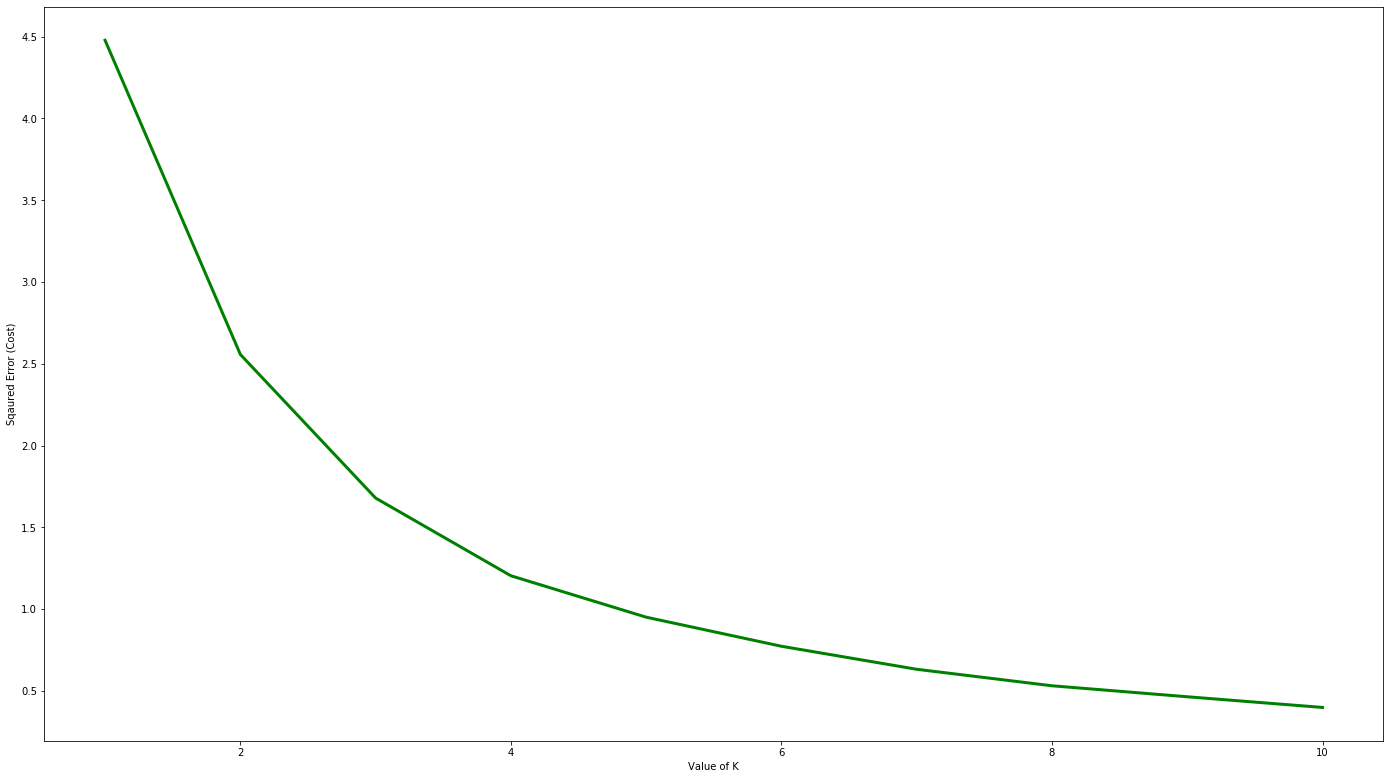

In [35]:
## Initializing X and y

a = df_returns[['Annual_Returns','Volatility']]
X = np.array(a)

plt.rcParams['figure.figsize'] = (24, 13.5)
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 1000) 
    KM.fit(X) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      

##plot the cost agaisnt K values

plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [36]:
## Clustering using K = 3

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=1000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

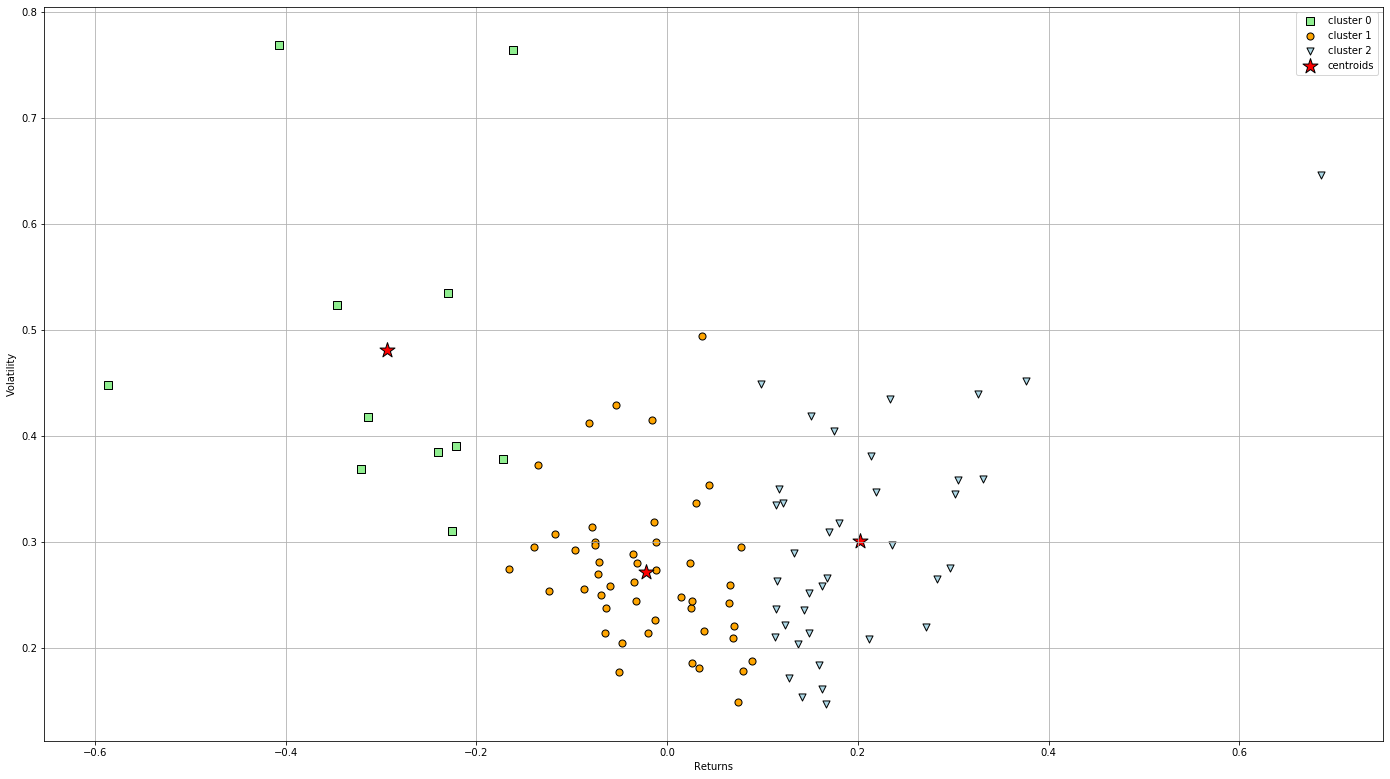

In [37]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 0')

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 1')

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 2')


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')

plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [38]:
df_returns['cluster'] = y_km

df_returns.cluster.value_counts()

1    48
2    38
0    11
Name: cluster, dtype: int64

In [39]:
# Portfolio Cluster 0
company_ticker = df_returns.loc[df_returns.cluster==1].index.tolist()

In [40]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2))

In [41]:
LargeCapCluster0 = intersection(company_ticker, large_df.columns)
Mid_SmallCapCluster0 = intersection(company_ticker, small_mid_df.columns)

In [42]:
Cluster0_df = large_df[LargeCapCluster0]
Cluster0_df = pd.merge(Cluster0_df, small_mid_df[Mid_SmallCapCluster0], left_index=True, right_index=True)

In [43]:
Cluster0_df

,ULTA,JNJ,WDC,PAYX,DIS,OMC,FTV,EMR,MTB,ADM,...,WOR,EWBC,INTL,SSP,FSB,KN,MPAA,FMBI,BXS,MLHR
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,256.679993,115.839996,69.430000,61.060001,106.080002,85.070000,53.730000,56.950001,156.740005,46.189999,...,47.090000,50.759998,40.410000,19.450001,41.549999,16.750000,27.910000,25.379999,31.150000,32.900002
2017-01-04,260.920013,115.650002,70.540001,61.290001,107.440002,85.699997,54.250000,56.610001,157.699997,46.110001,...,48.810001,51.849998,40.860001,19.930000,41.500000,16.950001,28.709999,25.809999,31.950001,33.049999
2017-01-05,264.140015,116.860001,70.550003,60.849998,107.379997,85.059998,53.939999,56.139999,155.380005,45.770000,...,48.419998,50.610001,38.770000,19.830000,40.849998,16.549999,28.500000,25.250000,31.650000,32.450001
2017-01-06,263.299988,116.300003,70.379997,61.270000,108.980003,85.809998,53.869999,56.400002,156.559998,44.720001,...,47.560001,50.730000,38.709999,19.660000,41.049999,16.410000,27.910000,25.340000,31.450001,32.049999
2017-01-09,260.790009,116.279999,71.860001,61.020000,108.360001,85.389999,53.730000,56.189999,155.960007,44.750000,...,46.419998,50.220001,38.330002,19.420000,40.150002,16.270000,27.790001,24.930000,30.900000,31.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-04,268.839996,143.479996,59.139999,82.379997,119.180000,70.980003,72.070000,66.669998,143.089996,39.369999,...,32.950001,39.919998,46.919998,10.890000,32.770000,16.870001,16.980000,18.520000,25.950001,34.450001
2020-03-05,257.140015,142.009995,57.709999,79.320000,113.980003,68.120003,68.160004,64.730003,131.589996,38.330002,...,30.940001,38.349998,43.580002,10.470000,31.469999,16.299999,16.469999,17.760000,25.110001,32.860001
2020-03-06,256.579987,142.029999,54.730000,77.500000,115.269997,65.820000,66.809998,62.139999,125.129997,37.639999,...,30.620001,36.860001,40.480000,10.260000,30.290001,16.250000,16.490000,16.990000,24.559999,31.990000


In [44]:
returns_daily = Cluster0_df.pct_change()

monthly_df = Cluster0_df.resample('BMS').first()
returns_monthly = monthly_df.pct_change().dropna()

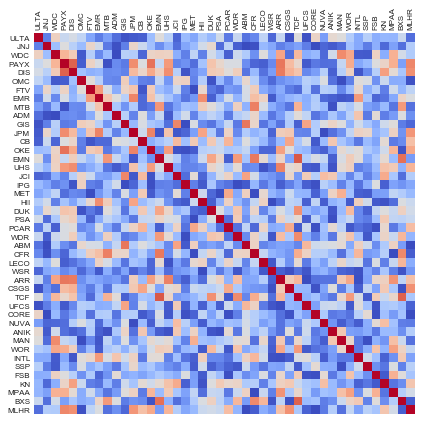

In [95]:
#find correlation matrix, i.e. the "distances" between each stock
#Load relevant packages
import datetime
from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

corr = Cluster0_df.corr().abs()
size = 7
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);

In [96]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
lower = corr.where(np.tril(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop_upper = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop_lower = [column for column in lower.columns if any(upper[column] > 0.80)]

In [97]:
lower

,ULTA,JNJ,WDC,PAYX,DIS,OMC,FTV,EMR,MTB,ADM,...,ANIK,MAN,WOR,INTL,SSP,FSB,KN,MPAA,BXS,MLHR
ULTA,1.000000,0.121357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JNJ,0.121357,1.000000,0.301318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WDC,0.570927,0.301318,1.000000,0.674598,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAYX,0.428756,0.498698,0.674598,1.000000,0.868063,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIS,0.471100,0.381862,0.594258,0.868063,1.000000,0.310328,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OMC,0.404443,0.293928,0.034887,0.040403,0.310328,1.000000,0.514853,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FTV,0.223764,0.554130,0.369311,0.564547,0.255171,0.514853,1.000000,0.742390,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMR,0.115151,0.449597,0.145415,0.473501,0.275252,0.375593,0.742390,1.000000,0.618118,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MTB,0.201249,0.106172,0.287590,0.014767,0.152195,0.145161,0.469944,0.618118,1.000000,0.338919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADM,0.078205,0.014535,0.002647,0.150574,0.156964,0.133879,0.239988,0.500204,0.338919,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
upper

,ULTA,JNJ,WDC,PAYX,DIS,OMC,FTV,EMR,MTB,ADM,...,ANIK,MAN,WOR,INTL,SSP,FSB,KN,MPAA,BXS,MLHR
ULTA,NaN,0.121357,0.570927,0.428756,0.471100,0.404443,0.223764,0.115151,0.201249,0.078205,...,0.532908,0.502582,0.360601,0.234674,0.371468,0.249792,0.275260,0.270315,0.433133,0.080291
JNJ,NaN,NaN,0.301318,0.498698,0.381862,0.293928,0.554130,0.449597,0.106172,0.014535,...,0.037101,0.076105,0.317031,0.233919,0.115817,0.251870,0.068448,0.209211,0.085398,0.362914
WDC,NaN,NaN,NaN,0.674598,0.594258,0.034887,0.369311,0.145415,0.287590,0.002647,...,0.452131,0.784072,0.713320,0.037346,0.034770,0.567096,0.248058,0.684411,0.464608,0.351917
PAYX,NaN,NaN,NaN,NaN,0.868063,0.040403,0.564547,0.473501,0.014767,0.150574,...,0.083439,0.411924,0.700257,0.228990,0.285875,0.496923,0.555140,0.690384,0.206137,0.789538
DIS,NaN,NaN,NaN,NaN,NaN,0.310328,0.255171,0.275252,0.152195,0.156964,...,0.050428,0.370694,0.574409,0.023453,0.150845,0.371098,0.732831,0.524971,0.332424,0.770219
OMC,NaN,NaN,NaN,NaN,NaN,NaN,0.514853,0.375593,0.145161,0.133879,...,0.088511,0.005236,0.123033,0.508353,0.479372,0.167205,0.437149,0.238538,0.244407,0.012826
FTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.742390,0.469944,0.239988,...,0.355308,0.140997,0.293162,0.547956,0.247221,0.349432,0.117411,0.448503,0.273701,0.396460
EMR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.618118,0.500204,...,0.048525,0.025617,0.038690,0.748712,0.326509,0.059799,0.090956,0.233981,0.562157,0.489769
MTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338919,...,0.014822,0.397618,0.338507,0.480271,0.204128,0.168263,0.289054,0.094828,0.746377,0.089564
ADM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.337512,0.216196,0.378954,0.618709,0.107944,0.520818,0.117321,0.192928,0.493426,0.162037


In [99]:
to_drop_upper

['DIS', 'OKE', 'ABM', 'CFR', 'ARR', 'TCF', 'BXS']

In [100]:
to_drop_lower

['DIS', 'OKE', 'ABM', 'CFR', 'ARR', 'TCF', 'BXS']

In [101]:
Cluster0_df.drop(Cluster0_df[to_drop_upper], axis=1, inplace=True)

In [102]:
Cluster0_df.shape

(801, 37)

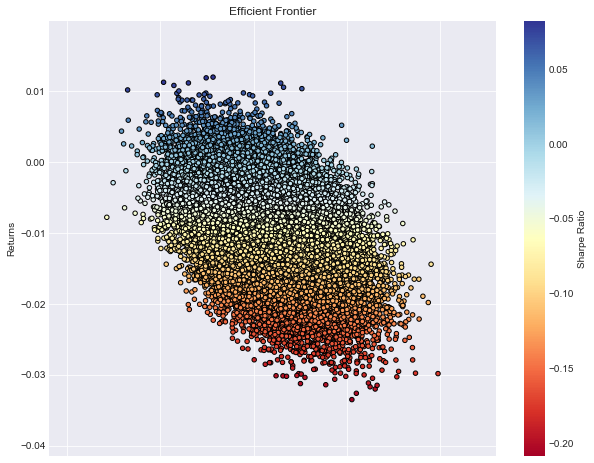

In [103]:
# calculating daily and annual returns of the stocks
returns_daily = Cluster0_df.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
selected = Cluster0_df.columns
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)


# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlBu', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.show()

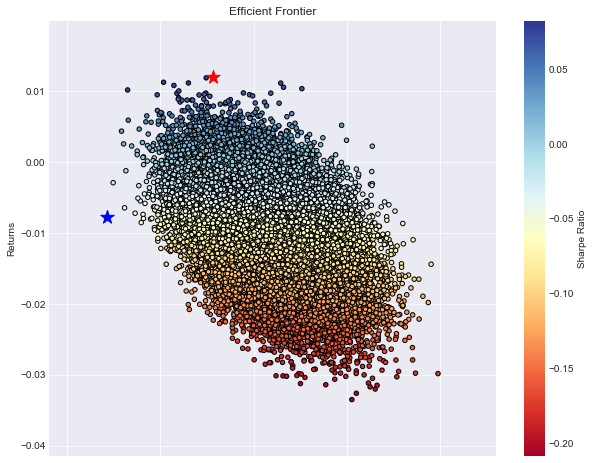

In [104]:
# finding min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlBu', edgecolors='black', figsize=(10, 8), grid=True)

plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='*', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='*', s=200 )
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.show()

In [105]:
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,ULTA Weight,JNJ Weight,WDC Weight,PAYX Weight,OMC Weight,FTV Weight,EMR Weight,...,NUVA Weight,ANIK Weight,MAN Weight,WOR Weight,INTL Weight,SSP Weight,FSB Weight,KN Weight,MPAA Weight,MLHR Weight
27898,0.011994,0.14565,0.082346,0.025692,0.047017,0.007969,0.050079,0.023826,0.055548,0.036556,...,0.014006,0.027177,0.043221,0.034878,0.024128,0.008557,0.0012,0.048951,0.002589,0.030551


In [106]:
min_variance_port

,Returns,Volatility,Sharpe Ratio,ULTA Weight,JNJ Weight,WDC Weight,PAYX Weight,OMC Weight,FTV Weight,EMR Weight,...,NUVA Weight,ANIK Weight,MAN Weight,WOR Weight,INTL Weight,SSP Weight,FSB Weight,KN Weight,MPAA Weight,MLHR Weight
8481,-0.007787,0.134236,-0.058012,0.034279,0.033945,0.010846,0.001593,0.046454,0.001249,0.005786,...,0.041452,0.054726,0.000678,0.008789,0.052878,0.038654,0.037109,0.013169,0.003472,0.003098
